# Observing Statistics

In [1]:
%pylab inline
import pandas as pd
import numpy as np
from collections import OrderedDict
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [2]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 12

In [3]:
#These are just written on the wiki
pre_jan = {'Ann Elliot': 13,
          'Aaron Meisner': 4,
          'James Lasker': 5,
          'Michael Schubnell': 17,
          'Martin Landriau': 7.5,
          'Satya Gontcho A Gontcho': 6.5,
          'Luke Tyas': 5,
          'Elizabeth Buckley-Geer': 1.5,
          'Arjun Dey': 0.5,
          'Connie Rockosi': 0.5,
          'Segev BenZvi': 0.5}

In [4]:
LO_names = ['Ann Elliott','Satya Gontcho A Gontcho','Martin Landriau','James Lasker','Michael Schubnell','Claire Poppett',
           'Elizabeth Buckley-Geer','Luke Tyas','Parker Fagrelius']

In [5]:
#Emails and institutions
trac = pd.read_csv('TracActivity.csv')
institutions = pd.read_csv('inst.csv')

In [6]:
def get_names(df,cols):
    all_names=[list(df[col]) for col in cols]
    all_names = np.unique(np.hstack(all_names))
    return all_names

In [7]:
def split_names(df):
    split_names = [name.split(' ') for name in list(df.name)]
    df['last_name'] = [n[-1] for n in split_names]
    df['first_name'] = [' '.join(n[0:-1]) for n in split_names]

    print_name = []
    for idx, row in df.iterrows():
        print_name.append(', '.join([row['last_name'], row['first_name']]))
    df['print_name'] = print_name
    df.sort_values('print_name',inplace=True)
    return df

In [8]:
def split_lo(df):
    df = split_names(df)
    LO = df[df.name.isin(LO_names)]
    NON_LO = df[~df.name.isin(LO_names)]
    return LO, NON_LO

## Observations Since January

In [9]:
obs_df = pd.read_csv('obs.csv')
obs_df.columns = ['date','lo','rlo_1','rlo_2','os_1','os_2','dqs','cal','fp_setup','fp_oncall']

In [10]:
obs_df['date'] = pd.to_datetime(obs_df.date)

In [11]:
obs_df = obs_df[obs_df.date < '2021-04-01']

In [12]:
all_names = get_names(obs_df,['lo','rlo_1','rlo_2','os_1','os_2','dqs'])

In [13]:
d_ = {}
for col in obs_df.columns[1:7]:
    if col in ['rlo_1','rlo_2','os_1','os_2']:
        d_[col] = (obs_df.groupby(col).count()*.5).date.to_dict()
    else:
        d_[col] = (obs_df.groupby(col).count()).date.to_dict()

In [14]:
obs_ = []
for name in all_names:
    if name not in ['-','None','nan']:
        lo = 0
        os = 0
        dqs = 0
        try:
            os += pre_jan[name]
        except:
            os +=0
        for c in ['lo','rlo_1','rlo_2']:
            try:
                lo += d_[c][name]
            except:
                lo += 0
        for c in ['os_1','os_2']:
            try:
                os += d_[c][name]
            except:
                os += 0
        for c in ['dqs']:
            try:
                dqs += d_[c][name]
            except:
                dqs += 0
        try:
            i = list(trac[trac.name==name].institute)[0]
            ii = institutions[institutions.inst == i].short.values[0]
            total = lo+os+dqs
            obs_.append([name,ii,lo,os,dqs,total])
        except:
            print('didnt work:',name)

didnt work: John Michael Della Costa III


In [15]:
OBS = pd.DataFrame(obs_, columns=['name','institution','lo','os','dqs','total'])

In [16]:
LO, NON_LO = split_lo(OBS)

In [17]:
LO.head()

,name,institution,lo,os,dqs,total,last_name,first_name,print_name
18,Elizabeth Buckley-Geer,Fermilab,0.0,4.5,0,4.5,Buckley-Geer,Elizabeth,"Buckley-Geer, Elizabeth"
4,Ann Elliott,OSU,19.0,0.0,0,19.0,Elliott,Ann,"Elliott, Ann"
39,Satya Gontcho A Gontcho,LBNL,12.5,10.5,0,23.0,Gontcho,Satya Gontcho A,"Gontcho, Satya Gontcho A"
31,Martin Landriau,LBNL,24.5,7.5,0,32.0,Landriau,Martin,"Landriau, Martin"
24,James Lasker,SMU,11.0,5.0,0,16.0,Lasker,James,"Lasker, James"


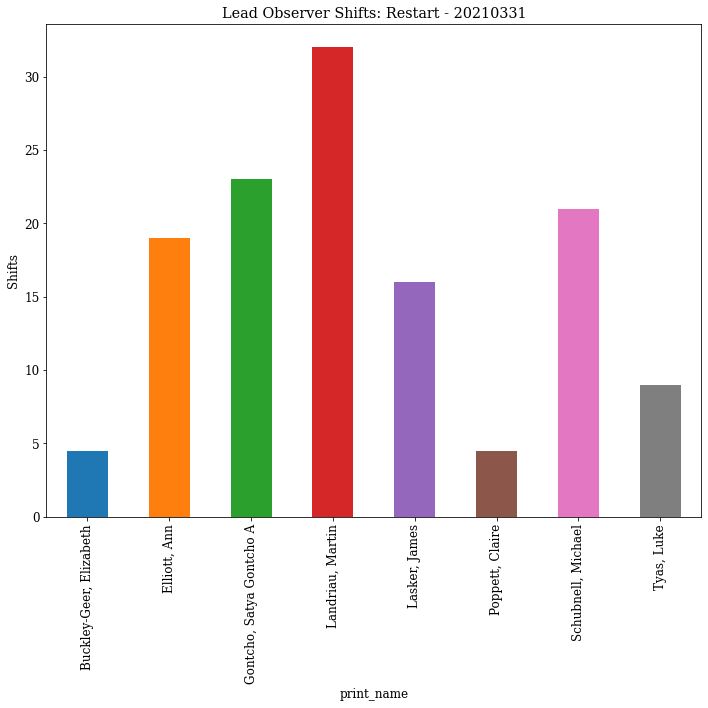

In [18]:
LO.plot.bar(x='print_name',y='total',color=plt.cm.tab10(np.arange(len(LO))),legend=None,figsize=(10,10))
plt.ylabel("Shifts")
plt.title("Lead Observer Shifts: Restart - 20210331")
plt.tight_layout()
plt.savefig("lo_post.png")

26


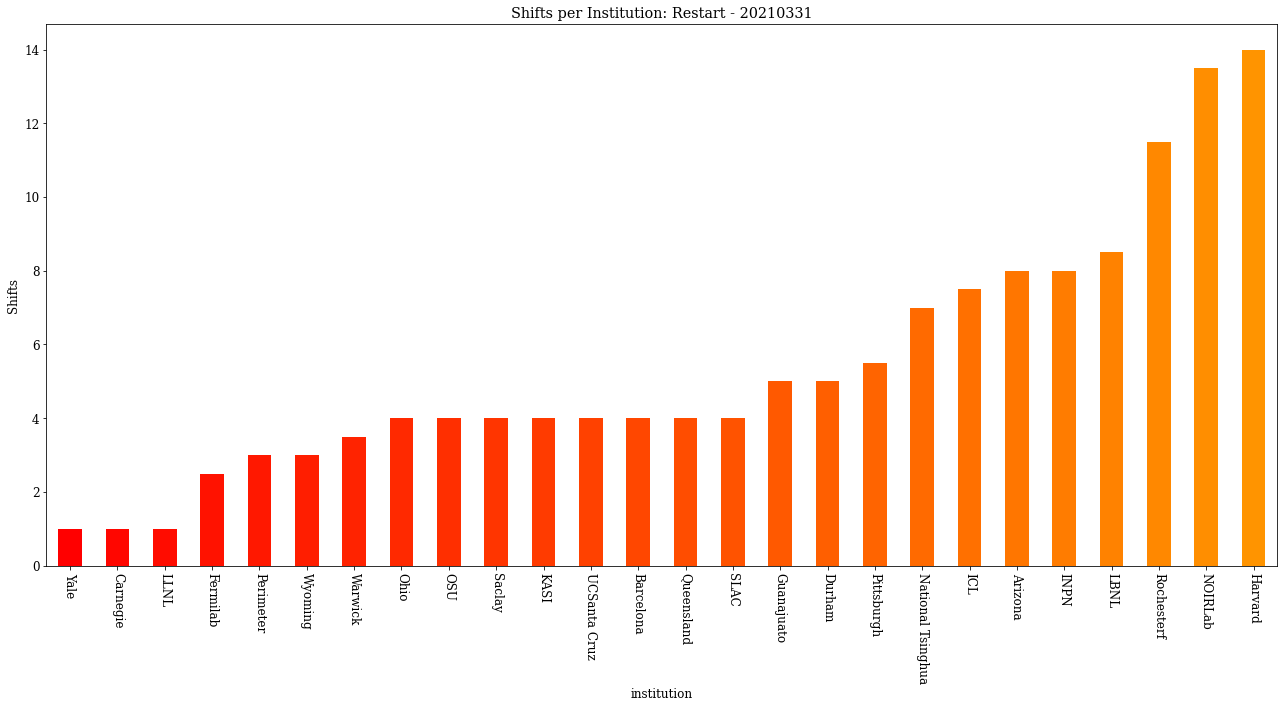

In [19]:
print(len(np.unique([f for f in list(NON_LO.institution) if f is not None])))
NON_LO.groupby('institution').sum().total.sort_values().plot.bar(x='institution',y='total',legend=None,
                                                                   color=plt.cm.hsv(np.arange(len(NON_LO))),rot=270,
                                                                figsize=(18,10))
plt.ylabel("Shifts")
plt.title("Shifts per Institution: Restart - 20210331")
plt.tight_layout()
plt.savefig("inst_pre.png")

38


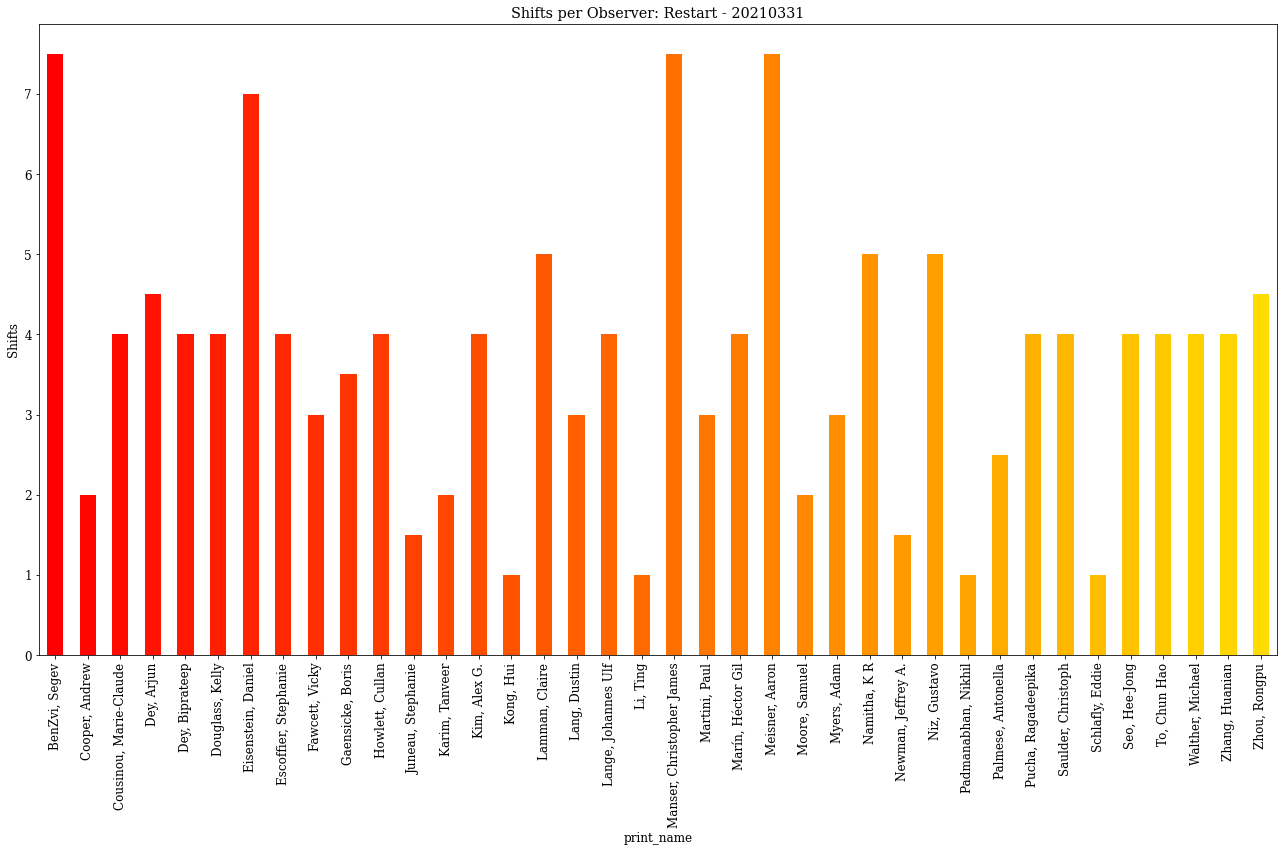

In [20]:
print(len(NON_LO))
NON_LO.plot.bar(x='print_name',y='total',color=plt.cm.hsv(np.arange(len(NON_LO))),legend=None,figsize=(18,12))
plt.ylabel("Shifts")
plt.title("Shifts per Observer: Restart - 20210331")
plt.tight_layout()
plt.savefig("obs_pre.png")

## Focal Plane and Calibrations

In [21]:
fp_df = obs_df[['date','cal','fp_setup','fp_oncall']]

In [22]:
fp_names = get_names(fp_df,['cal','fp_setup','fp_oncall'])

In [23]:
fp_df['Date'] = pd.to_datetime(fp_df['date'], format='%b. %d, %Y')

/Users/pfagrelius/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [24]:
fp_done = fp_df[fp_df.Date < '2021-03-15']

In [25]:
fp_ = {}
for name in fp_names:
    if name not in ['nan']:
        fp_[name] = {}
        for col in ['cal','fp_setup','fp_oncall']:
            d = fp_done.groupby(col).count().Date 
            try:
                fp_[name][col] =d[name]
            except:
                fp_[name][col] = 0

In [26]:
fp_ = pd.DataFrame.from_dict(fp_,orient='index')
fp_['name'] = fp_.index
fp_ = split_names(fp_)

Text(0.5, 1.0, 'Shifts for FP and Calibration Work Since Restart')

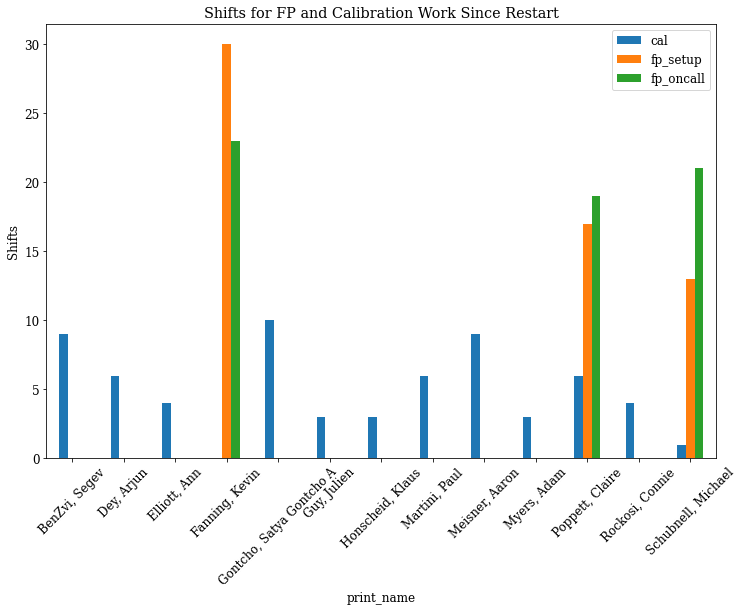

In [27]:
fp_.plot.bar(x='print_name',figsize=(12,8),rot=45)
plt.ylabel("Shifts")
plt.title("Shifts for FP and Calibration Work Since Restart")

## Previous Observations

In [28]:
old_df = pd.read_csv('old_obs.csv')
old_df = old_df[['Date','Lead Obs','Obs1','Obs2','Obs3']]

In [29]:
d = ['{} 2020'.format(d[:-2]) for d in list(old_df.Date)]
old_df['date'] = pd.to_datetime(d, format='%b %d %Y')

In [30]:
old_df.date

0     2020-10-14
1     2020-10-15
2     2020-10-16
3     2020-10-17
4     2020-10-18
         ...    
149   2020-03-11
150   2020-03-12
151   2020-03-13
152   2020-03-14
153   2020-03-15
Name: date, Length: 154, dtype: datetime64[ns]

In [31]:
old_df = old_df[old_df.date < '2020-03-16']

In [32]:
old_names=get_names(old_df,['Lead Obs','Obs1','Obs2','Obs3'])

In [33]:
d = {}
for col in old_df.columns[1:5]:
        d[col] = (old_df.groupby(col).count()).date.to_dict()

In [34]:
obs_old = []
for name in old_names:
    if name not in ['nan']:
        lo = 0
        os = 0
        for c in ['Lead Obs']:
            try:
                lo += d[c][name]
            except:
                lo += 0
        for c in ['Obs1','Obs2','Obs3']:
            try:
                os += d[c][name]
            except:
                os += 0
        try:
            i = list(trac[trac.name==name].institute)[0]
            ii = institutions[institutions.inst == i].short.values[0]
            total = lo+os
            obs_old.append([name,ii,lo,os,0,total])
        except:
            print('didnt work:', name)
            total = lo+os
            obs_old.append([name,None,lo,os,0,total])

didnt work: Rebecca Canning (Becky)


In [35]:
OBS_old = pd.DataFrame(obs_old,columns=['name','institution','lo','os','dqs','total'])

In [36]:
LO_old, NON_LO_old = split_lo(OBS_old) 

In [37]:
LO_old

,name,institution,lo,os,dqs,total,last_name,first_name,print_name
19,Elizabeth Buckley-Geer,Fermilab,7,0,0,7,Buckley-Geer,Elizabeth,"Buckley-Geer, Elizabeth"
6,Ann Elliott,OSU,7,0,0,7,Elliott,Ann,"Elliott, Ann"
35,Parker Fagrelius,NOIRLab,17,0,0,17,Fagrelius,Parker,"Fagrelius, Parker"
40,Satya Gontcho A Gontcho,LBNL,7,0,0,7,Gontcho,Satya Gontcho A,"Gontcho, Satya Gontcho A"
29,Martin Landriau,LBNL,15,0,0,15,Landriau,Martin,"Landriau, Martin"
14,Claire Poppett,LBNL,7,0,0,7,Poppett,Claire,"Poppett, Claire"
31,Michael Schubnell,Michigan,7,0,0,7,Schubnell,Michael,"Schubnell, Michael"
28,Luke Tyas,Durham,8,0,0,8,Tyas,Luke,"Tyas, Luke"


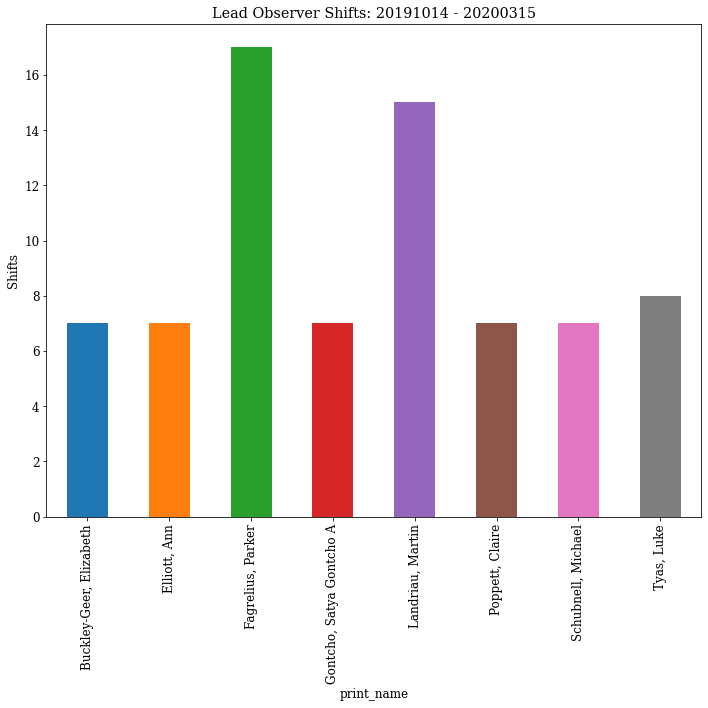

In [38]:
LO_old.plot.bar(x='print_name',y='total',color=plt.cm.tab10(np.arange(len(LO_old))),
                legend=None,figsize=(10,10))
plt.ylabel("Shifts")
plt.title("Lead Observer Shifts: 20191014 - 20200315")
plt.tight_layout()
plt.savefig("lo_pre.png")

37


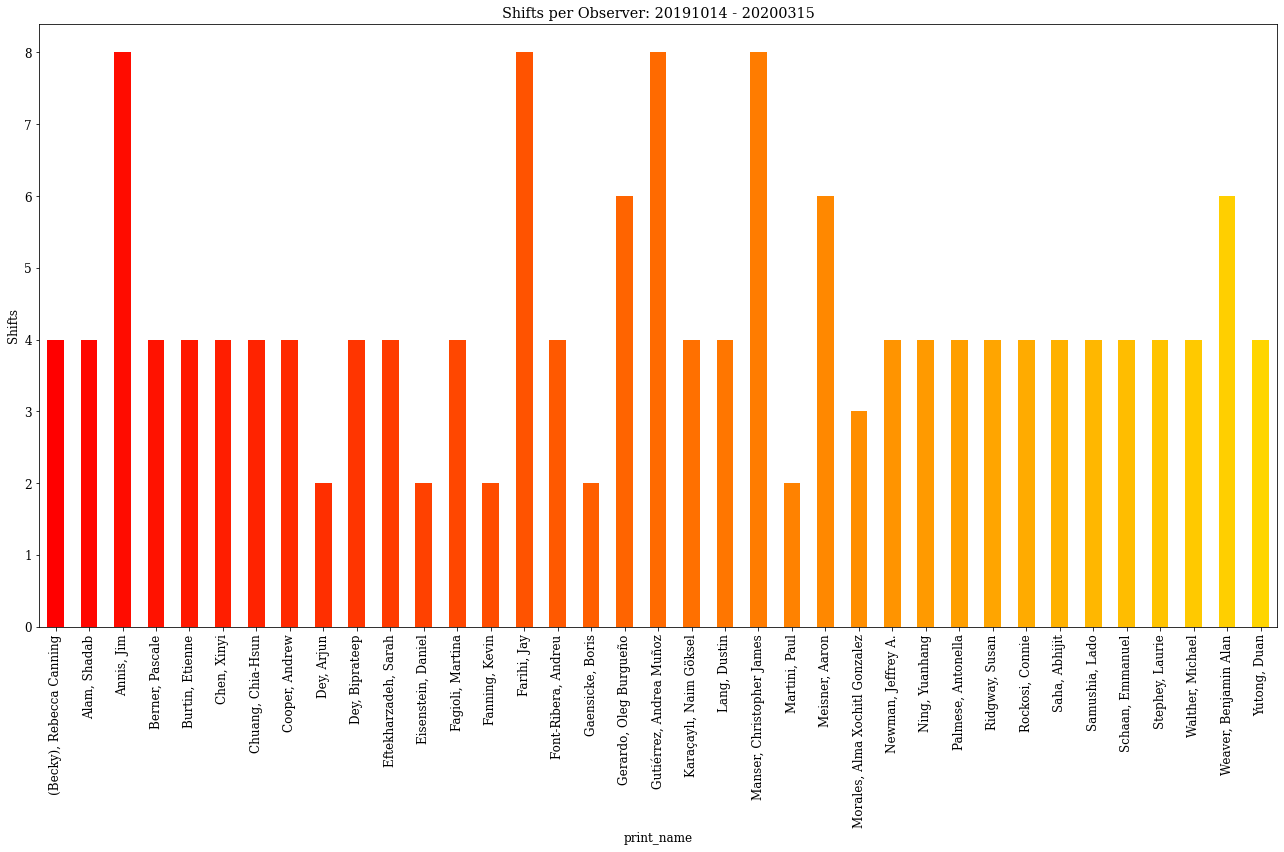

In [39]:
print(len(NON_LO_old))
NON_LO_old.plot.bar(x='print_name',y='os',color=plt.cm.hsv(np.arange(len(NON_LO_old))),
                    legend=None,figsize=(18,12))
plt.ylabel("Shifts")
plt.title("Shifts per Observer: 20191014 - 20200315")
plt.tight_layout()
plt.savefig("obs_post.png")

24


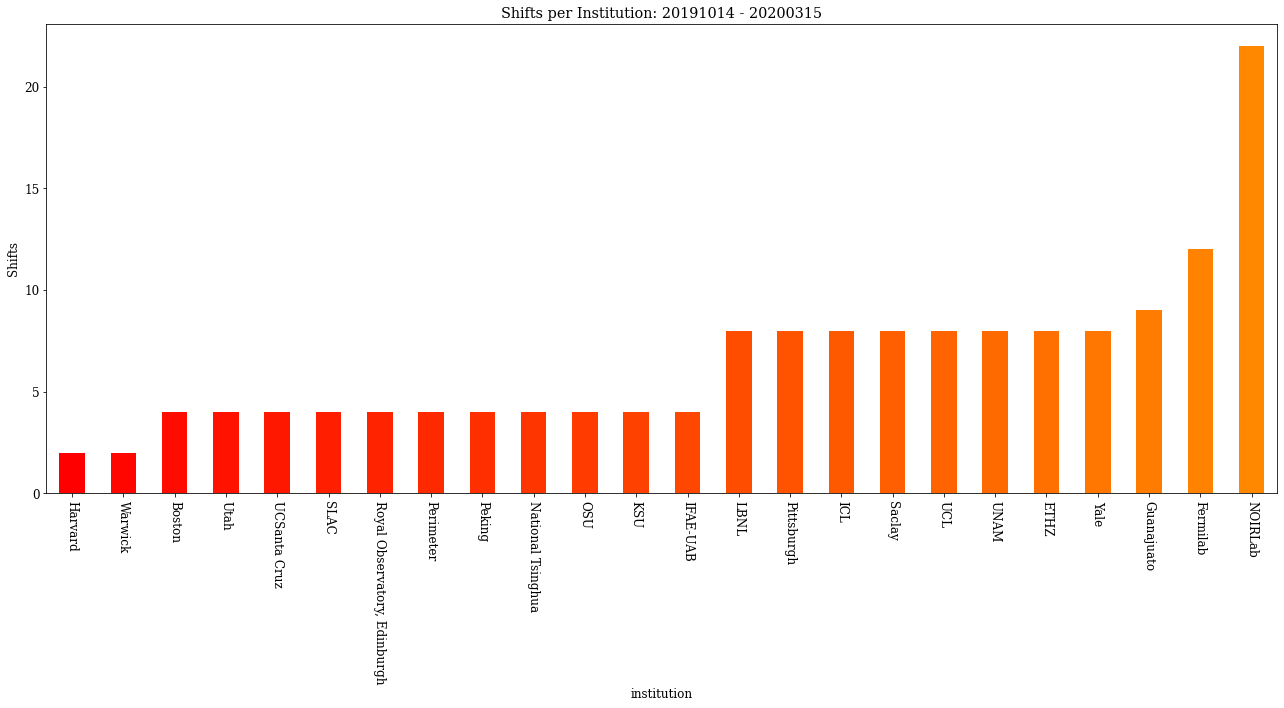

In [40]:
print(len(np.unique([f for f in list(NON_LO_old.institution) if f is not None])))
NON_LO_old.groupby('institution').sum().total.sort_values().plot.bar(x='institution',y='total',legend=None,
                                                                   color=plt.cm.hsv(np.arange(len(NON_LO_old))),rot=270,
                                                                    figsize=(18,10))
plt.ylabel("Shifts")
plt.title("Shifts per Institution: 20191014 - 20200315")
plt.tight_layout()
plt.savefig("inst_post.png")

# Combined

In [41]:
OBS_full = pd.concat([OBS,OBS_old])

In [42]:
LO_full, NLO_full = split_lo(OBS_full)

In [43]:
LO_full.head()

,name,institution,lo,os,dqs,total,last_name,first_name,print_name
18,Elizabeth Buckley-Geer,Fermilab,0.0,4.5,0,4.5,Buckley-Geer,Elizabeth,"Buckley-Geer, Elizabeth"
19,Elizabeth Buckley-Geer,Fermilab,7.0,0.0,0,7.0,Buckley-Geer,Elizabeth,"Buckley-Geer, Elizabeth"
4,Ann Elliott,OSU,19.0,0.0,0,19.0,Elliott,Ann,"Elliott, Ann"
6,Ann Elliott,OSU,7.0,0.0,0,7.0,Elliott,Ann,"Elliott, Ann"
35,Parker Fagrelius,NOIRLab,17.0,0.0,0,17.0,Fagrelius,Parker,"Fagrelius, Parker"


In [44]:
NLO_full[NLO_full.institution == 'Portsmouth']

,name,institution,lo,os,dqs,total,last_name,first_name,print_name


In [45]:
institutions

,inst,short,East
0,AMU RPG - Institut National de Physique Nucléa...,INPN,TRUE
1,AMU RPG - Laboratoire d'Astrophysique de Marse...,LAM,TRUE
2,AMU RPG - Observatoire des Sciences de l'Unive...,Institut Pytheas,TRUE
3,Argonne National Lab,Argonne,FALSE
4,Australian National University,ANU,TRUE
...,...,...,...
99,Winlight System,Winlight,FALSE
100,Yale University,Yale,FALSE
101,Yonsei University,Yonsei,TRUE
102,Yunnan University,Yunnan,TRUE


In [46]:
LO_full.groupby('print_name').sum()

,lo,os,dqs,total
print_name,,,,
"Buckley-Geer, Elizabeth",7.0,4.5,0,11.5
"Elliott, Ann",26.0,0.0,0,26.0
"Fagrelius, Parker",17.0,0.0,0,17.0
"Gontcho, Satya Gontcho A",19.5,10.5,0,30.0
"Landriau, Martin",39.5,7.5,0,47.0
"Lasker, James",11.0,5.0,0,16.0
"Poppett, Claire",9.0,2.5,0,11.5
"Schubnell, Michael",9.0,19.0,0,28.0
"Tyas, Luke",11.5,5.5,0,17.0


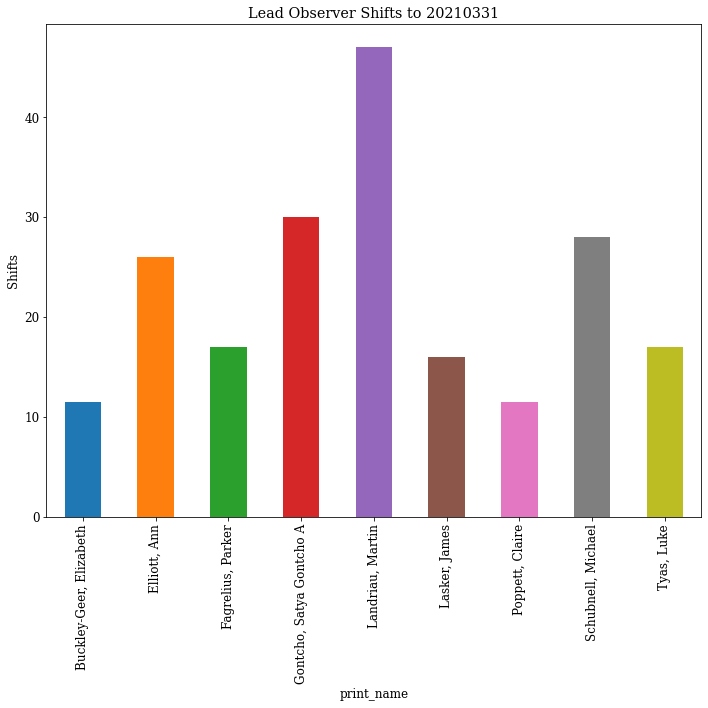

In [47]:
LO_full.groupby('print_name').sum().total.plot.bar(color=plt.cm.tab10(np.arange(len(LO_full))),
                                                   legend=None,figsize=(10,10))
plt.ylabel("Shifts")
plt.title("Lead Observer Shifts to 20210331")
plt.tight_layout()
plt.savefig("lo_total.png")

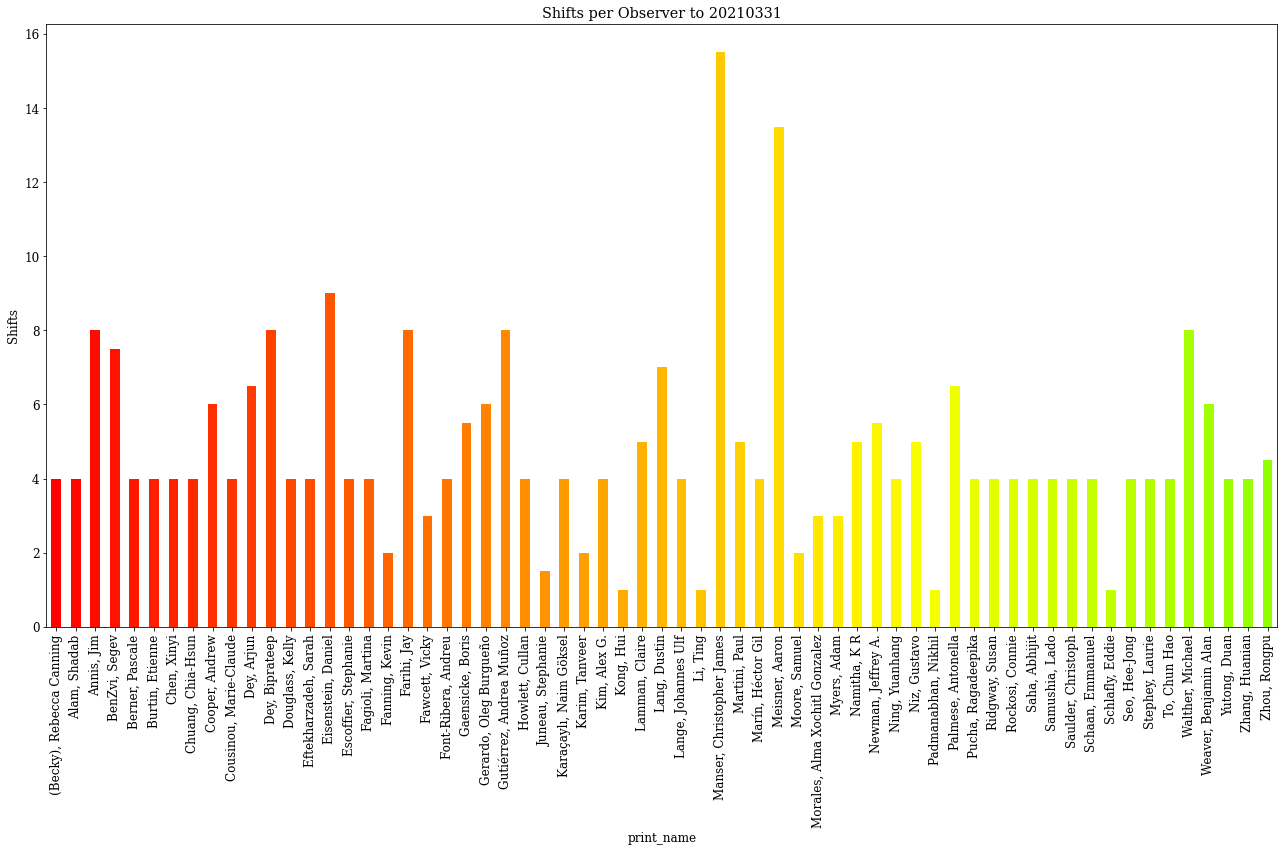

In [48]:
NLO_full.groupby('print_name').sum().total.plot.bar(color=plt.cm.hsv(np.arange(len(NLO_full))),legend=None,
                                                    figsize=(18,12))
plt.ylabel("Shifts")
plt.title("Shifts per Observer to 20210331")
plt.tight_layout()
plt.savefig("obs_total.png")

In [49]:
s = NLO_full.groupby('print_name').sum().total

In [50]:
len(s)

63

In [51]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(s)

print_name
(Becky), Rebecca Canning           4.0
Alam, Shadab                       4.0
Annis, Jim                         8.0
BenZvi, Segev                      7.5
Berner, Pascale                    4.0
Burtin, Etienne                    4.0
Chen, Xinyi                        4.0
Chuang, Chia-Hsun                  4.0
Cooper, Andrew                     6.0
Cousinou, Marie-Claude             4.0
Dey, Arjun                         6.5
Dey, Biprateep                     8.0
Douglass, Kelly                    4.0
Eftekharzadeh, Sarah               4.0
Eisenstein, Daniel                 9.0
Escoffier, Stephanie               4.0
Fagioli, Martina                   4.0
Fanning, Kevin                     2.0
Farihi, Jay                        8.0
Fawcett, Vicky                     3.0
Font-Ribera, Andreu                4.0
Gaensicke, Boris                   5.5
Gerardo, Oleg Burgueño             6.0
Gutiérrez, Andrea Muñoz            8.0
Howlett, Cullan                    4.0
Juneau, Stepha

35


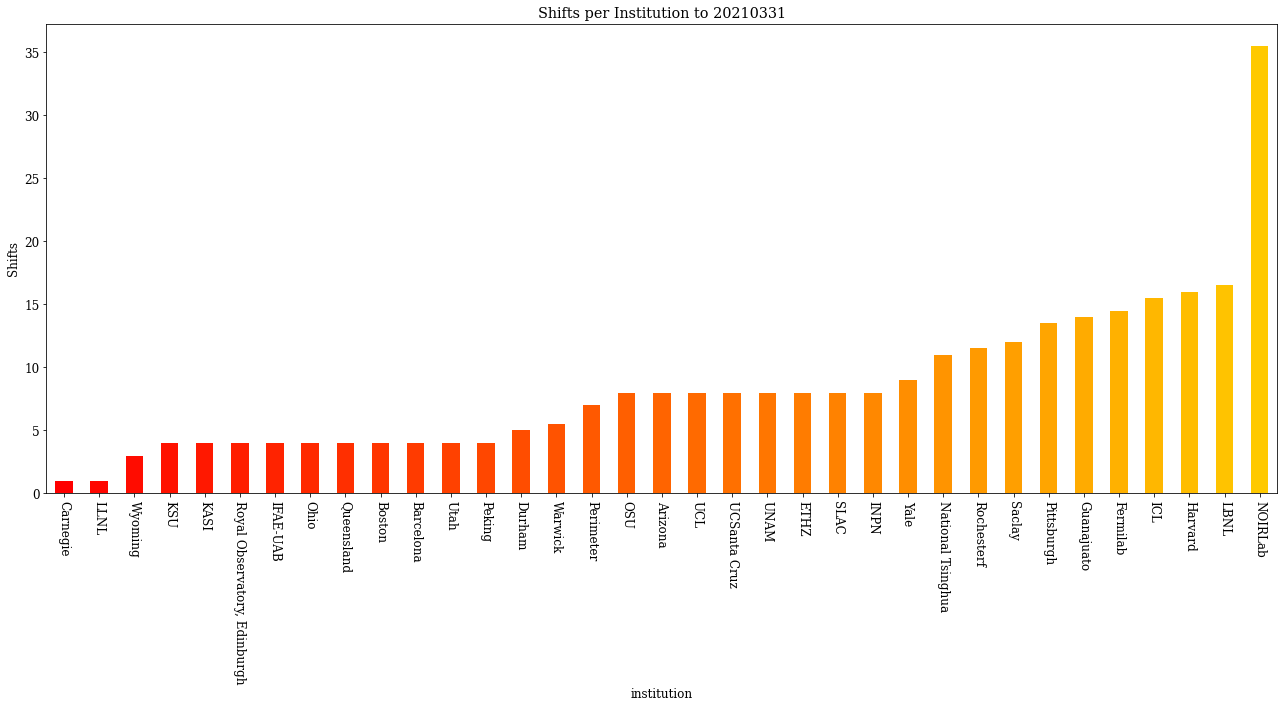

In [52]:
print(len(np.unique([f for f in list(NLO_full.institution) if f is not None])))
NLO_full.groupby('institution').sum().total.sort_values().plot.bar(x='institution',y='total',legend=None,
                                                                   color=plt.cm.hsv(np.arange(len(NLO_full))),rot=270,
                                                                  figsize=(18,10))
plt.ylabel("Shifts")
plt.title("Shifts per Institution to 20210331")
plt.tight_layout()
plt.savefig("inst_total.png")

In [53]:
OBS_full.groupby('institution').sum().to_csv('inst_stats.csv')

In [54]:
len(OBS_full.groupby('institution'))

37

## Institions that have not observed

In [55]:
no_obs = [inst for inst in institutions if inst not in list(NON_LO.institution)]

In [56]:
no_obs_old = [inst for inst in institutions if inst not in list(NON_LO_old.institution)]

In [57]:
never_obs = []
not_since_return = []
for inst in list(institutions.short):
    if inst not in list(NON_LO_old.institution):
        if inst not in list(NON_LO.institution):
            if inst not in list(LO_old.institution):
                
                never_obs.append(inst)
    else:
        if inst not in list(NON_LO.institution):
            if inst not in list(LO.institution):
                not_since_return.append(inst)

In [58]:
pd.DataFrame(never_obs).to_csv('inst_never_obs.csv')

In [59]:
pd.DataFrame(not_since_return)

,0
0,IFAE-UAB
1,Boston
2,Peking
3,ETHZ
4,KSU
5,UNAM
6,"Royal Observatory, Edinburgh"
7,UCL
8,Utah
